In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
dados = pd.read_csv('../dados/heart_disease.csv')

In [5]:
dados 

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [6]:
dados.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [8]:
dados.shape

(4238, 16)

In [9]:
dados.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [10]:
dados = dados[~dados['education'].isnull() ]
dados = dados[~dados['cigsPerDay'].isnull()]
dados = dados[~dados['BPMeds'].isnull()]
dados = dados[~dados['totChol'].isnull()]
dados = dados[~dados['BMI'].isnull()]
dados = dados[~dados['heartRate'].isnull()]
dados = dados[~dados['glucose'].isnull()]

In [11]:
dados.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [12]:
numerical_features = dados.select_dtypes(include=[np.number]).columns

<Axes: >

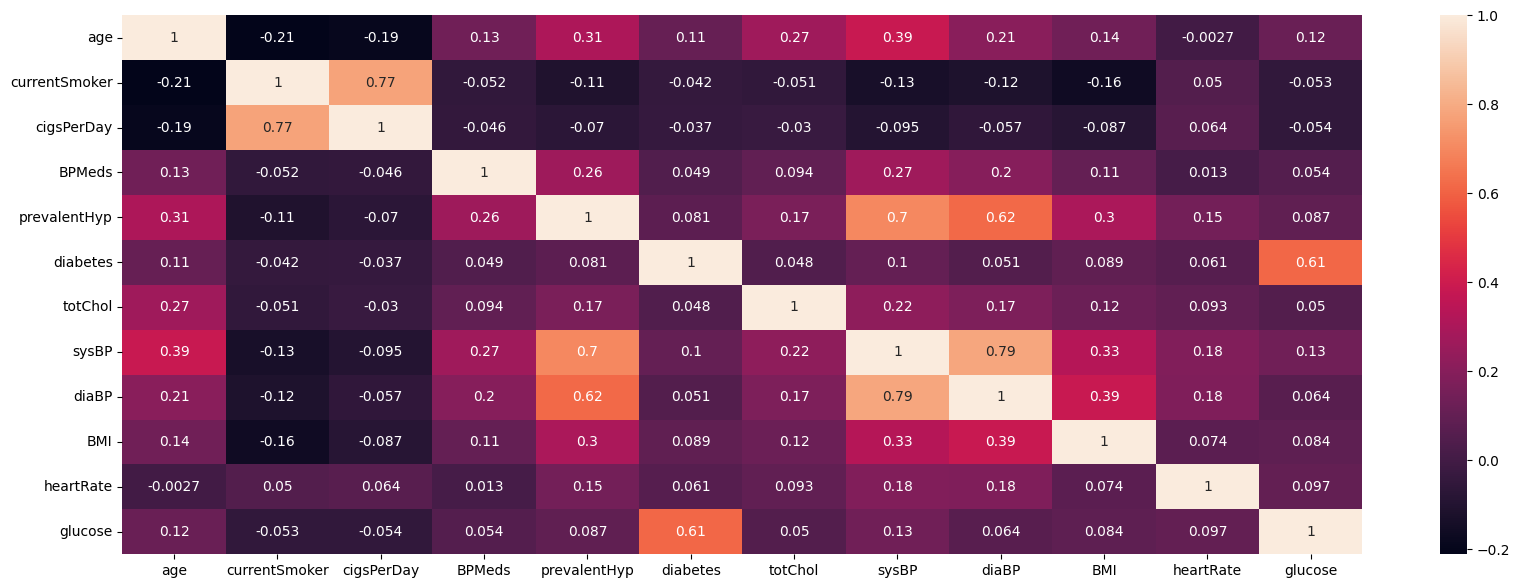

In [13]:
plt.figure(figsize=(20,7))
sns.heatmap(dados[numerical_features].corr(), annot=True)

In [16]:
dados.loc[dados['Heart_ stroke'] == 'No', 'Heart_ stroke'] = 0
dados.loc[dados['Heart_ stroke'] == 'yes', 'Heart_ stroke'] = 1

In [18]:
dados['Heart_ stroke'] = dados['Heart_ stroke'].astype(int)

In [19]:
import category_encoders as ce

In [20]:
ce_OHE = ce.OneHotEncoder(cols=['Gender', 'education', 'prevalentStroke']) 
dados = ce_OHE.fit_transform(dados)
dados.head()

,Gender_1,Gender_2,age,education_1,education_2,education_3,education_4,currentSmoker,cigsPerDay,BPMeds,...,prevalentStroke_2,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,0,39,1,0,0,0,0,0.0,0.0,...,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,1,46,0,1,0,0,0,0.0,0.0,...,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,0,48,0,0,1,0,1,20.0,0.0,...,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,1,61,0,0,0,1,1,30.0,0.0,...,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,1,46,0,0,0,1,1,23.0,0.0,...,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
X = dados.drop("Heart_ stroke", axis=1) 
y = dados["Heart_ stroke"]

In [22]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=14) 

In [23]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_jobs=-1,
                           random_state=14)


rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [24]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2924, 2924, 732, 732)

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [26]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [27]:
X = dados.drop("Heart_ stroke", axis=1) 
y = dados["Heart_ stroke"]

In [28]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1) 

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:

rf = DecisionTreeClassifier()


rf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
print("model score: %.3f" % rf.score(X_test, y_test))

model score: 0.768


In [32]:
from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

In [64]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
           ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)  
           a = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 
           print(a)
           plt.show() 

In [33]:
def drawRocCurve(classifier, nameClassifier, X_test, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

Random model: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.595


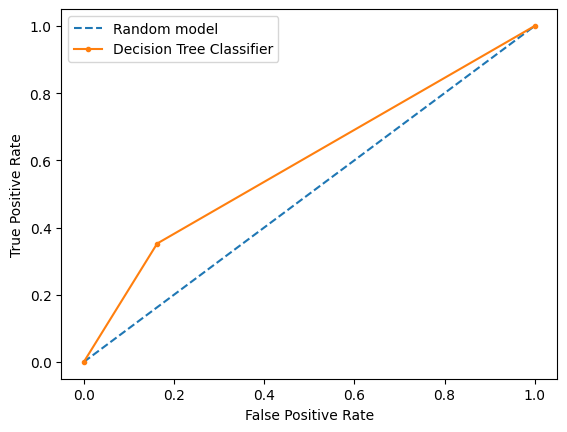

In [34]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(rf, "Decision Tree Classifier", X_test, y_test)

In [35]:
show_score(rf)

{'Training MAE': 0.0,
 'Test MAE': 0.23224043715846995,
 'Training MSE': 0.0,
 'Test MSE': 0.11158061798646753,
 'Training RMSE': 0.0,
 'Test RMSE': 0.33403685124020005,
 'Training R2': 1.0,
 'Test R2': -0.8901799954431535}

In [ ]:
 X_test, y_test
X_train, X_test, y_train, y_test

In [36]:
score_treino = rf.score(X_train, y_train)

In [43]:
score_treino

1.0

In [48]:
Y_previsto = rf.predict(X_test)

In [45]:
score_teste = rf.score(X_test, y_test)

In [46]:
score_teste

0.76775956284153

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_test,Y_previsto)

In [50]:
cm

array([[525, 102],
       [ 68,  37]], dtype=int64)

<Axes: >

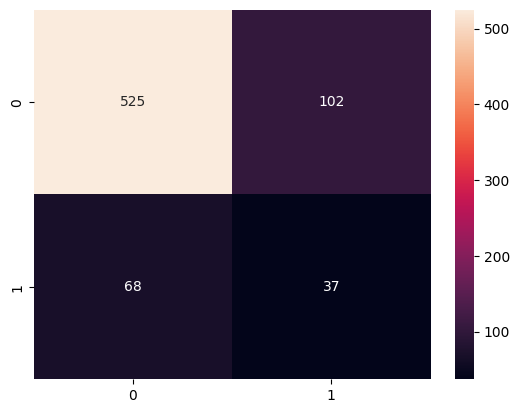

In [51]:
sns.heatmap(cm,annot=True, fmt="d")

In [52]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [53]:
cr = classification_report(y_test,Y_previsto)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       627
           1       0.27      0.35      0.30       105

    accuracy                           0.77       732
   macro avg       0.58      0.59      0.58       732
weighted avg       0.80      0.77      0.78       732



In [54]:
f1 = f1_score(y_test,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 30.33%


In [55]:
precisao = precision_score(y_test,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 26.62%


In [56]:
avg_precision = average_precision_score(y_test,Y_previsto)
print("Averaged Precision score = {:0.2f}%".format(avg_precision*100))

Averaged Precision score = 18.67%


In [57]:
rec = recall_score(y_test,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 35.24%


In [58]:
acc = accuracy_score(y_test,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 76.78%


In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_previsto)

0.23224043715846995

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Y_previsto)

0.23224043715846995

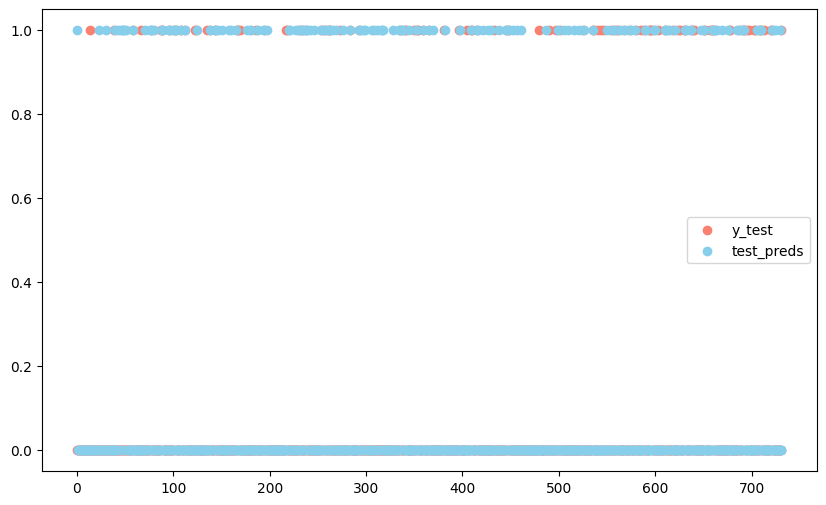

In [61]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();